In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

#Loading the Dataset

In [3]:
df=pd.read_csv('economic_index.csv')

#Understanding the Data

In [4]:
df.shape

(24, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


#Drop un-necessary columns

In [7]:
df_new=df.drop(columns=["Unnamed: 0","year","month"],axis=1)

In [8]:
df_new.shape

(24, 3)

In [9]:
df_new.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df_new.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


#Statistical information of the Data

In [12]:
df_new.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


In [11]:
df_new.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


#Pairplot visualization

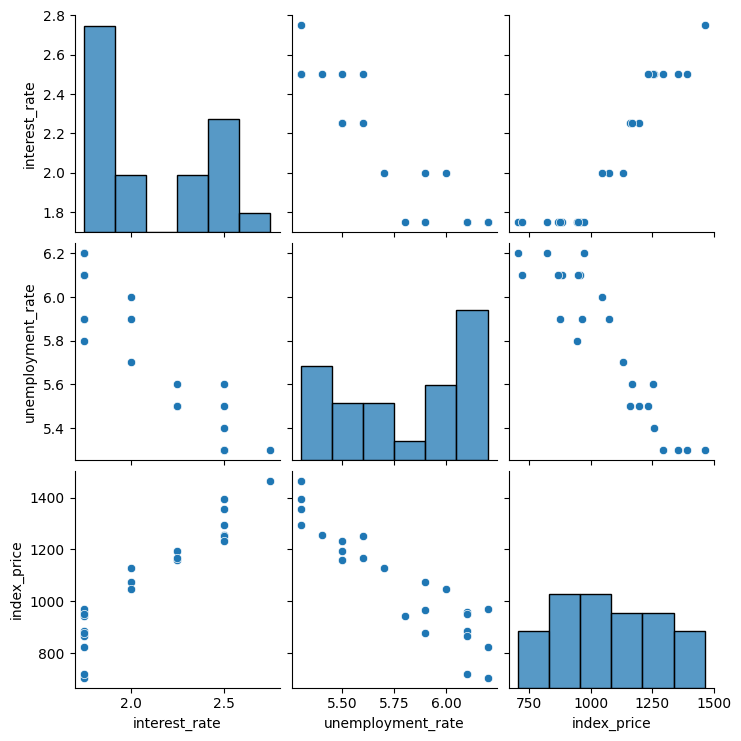

In [13]:
sns.pairplot(df_new)

#Understanding the continuous variables

Text(0, 0.5, 'unemployment rate')

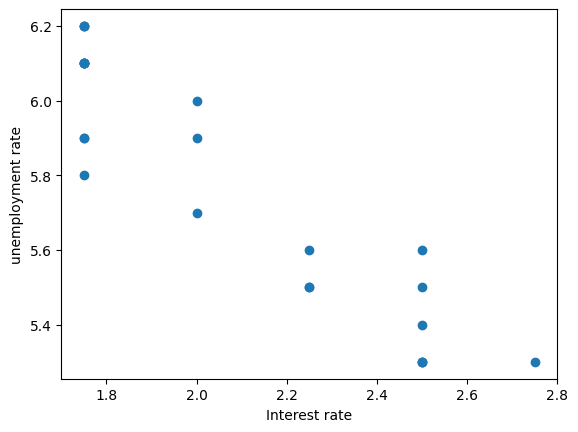

In [14]:
plt.scatter(df_new['interest_rate'],df_new['unemployment_rate'])
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

#Segregating Independent & Dependent Features

In [15]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

#Splitting the Dataset for Training and Testing

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#Standardizing the Data using StandardScaler

In [19]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Creating Linear Regression Model

In [22]:
rg=LinearRegression()
rg.fit(X_train,y_train)

LinearRegression()

#Cross Validation

In [24]:
validation_score=cross_val_score(rg,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [25]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

#Prediction

In [26]:
y_pred=rg.predict(X_test)

In [27]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [29]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("The Mean Squared Error is : ",mse)
print("The Mean Absolute Error is : ",mae)
print("The RMS Error is : ",rmse)

The Mean Squared Error is :  8108.567426306604
The Mean Absolute Error is :  73.80444932337097
The RMS Error is :  90.04758423359621


# R2 Score

In [31]:
score=r2_score(y_test,y_pred)
print("R2 Score : ",score)

R2 Score :  0.7591371539010257


#Adjusted R2 Score

In [33]:
x=1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R2 Score : ",x)

The Adjusted R2 Score :  0.5985619231683761


#Plotting the Prediction vs Tested Data

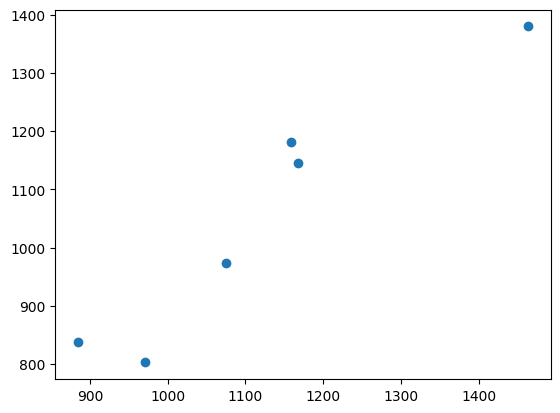

In [34]:
plt.scatter(y_test,y_pred)

#Checking the Residuals

In [37]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


#Checking if the squared sum of residuals is equal to 0 or not

In [38]:
squared_sum_residuals = (residuals ** 2).sum()
print("Squared Sum of Residuals (SSR):", squared_sum_residuals)

Squared Sum of Residuals (SSR): 48651.404557839625


In [39]:
if pd.api.types.is_number(squared_sum_residuals) and abs(squared_sum_residuals) < 1e-10:
    print("✅ Perfect fit: SSR is 0")
else:
    print("❌ Not a perfect fit")

❌ Not a perfect fit


#Hyperparamater Tuning with GridSearchCV

In [41]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [42]:
gds = GridSearchCV(estimator=rg,param_grid=param_grid,scoring='r2',cv=5,n_jobs=-1)

In [43]:
gds.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

#Get the Best Parameters for the Model

In [44]:
print("\nBest Parameters:", gds.best_params_)
print("Best Cross-Validation R² Score:", gds.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Cross-Validation R² Score: 0.8431354650801491


#Evaluate this on the testing data

In [46]:
best_model = gds.best_estimator_
test_score = best_model.score(X_test,y_test)
print("Test R² Score:", test_score)

Test R² Score: 0.7591371539010257


Now let's try to increase the R2 score by implementing a Pipeline with Polynomial Attributes, Standard Scaler for Standardization, and a Ridge value

In [50]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

#Hyperparameter Tuning

In [51]:
param_grid = {
    'poly__degree': [1, 2, 3],        # test polynomial degrees
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # regularization strength
}

#GridSearch Cross Validation

In [52]:
grid=GridSearchCV(pipe,param_grid,scoring='r2',cv=5,n_jobs=-1)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [54]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

best_model = grid.best_estimator_
test_r2 = best_model.score(X_test, y_test)
print("Test R² Score:", test_r2)

Best Parameters: {'poly__degree': 3, 'ridge__alpha': 1}
Best Cross-Validation R²: 0.8568507546142715
Test R² Score: 0.619130631084545
